# AI - Lab 1

## Data Processing - Audio Visual Textual Dataset Formats

### Audio

In [20]:
!wget https://zenodo.org/record/2552860/files/FSDKaggle2018.meta.zip?download=1
!unzip FSDKaggle2018.meta.zip?download=1

--2020-08-17 05:23:42--  https://zenodo.org/record/2552860/files/FSDKaggle2018.meta.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128508 (125K) [application/octet-stream]
Saving to: ‘FSDKaggle2018.meta.zip?download=1’

FSDKaggle2018.meta. 100%[===================>] 125.50K   154KB/s    in 0.8s    

2020-08-17 05:23:45 (154 KB/s) - ‘FSDKaggle2018.meta.zip?download=1’ saved [128508/128508]

Archive:  FSDKaggle2018.meta.zip?download=1
   creating: FSDKaggle2018.meta/
  inflating: FSDKaggle2018.meta/test_post_competition_scoring_clips.csv  
  inflating: FSDKaggle2018.meta/train_post_competition.csv  


In [23]:
import numpy as np
np.random.seed(1001)

import os
import shutil

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
# from sklearn.cross_validation import StratifiedKFold

%matplotlib inline
matplotlib.style.use('ggplot')
train = pd.read_csv("/content/FSDKaggle2018.meta/train_post_competition.csv")
test = pd.read_csv("/content/FSDKaggle2018.meta/test_post_competition_scoring_clips.csv")

In [24]:
train.head()

,fname,label,manually_verified,freesound_id,license
0,00044347.wav,Hi-hat,0,28739,Attribution
1,001ca53d.wav,Saxophone,1,358827,Attribution
2,002d256b.wav,Trumpet,0,10897,Creative Commons 0
3,0033e230.wav,Glockenspiel,1,325017,Attribution
4,00353774.wav,Cello,1,195688,Attribution


Number of training examples= 9473   Number of classes= 41
['Hi-hat' 'Saxophone' 'Trumpet' 'Glockenspiel' 'Cello' 'Knock'
 'Gunshot_or_gunfire' 'Clarinet' 'Computer_keyboard' 'Keys_jangling'
 'Snare_drum' 'Writing' 'Laughter' 'Tearing' 'Fart' 'Oboe' 'Flute' 'Cough'
 'Telephone' 'Bark' 'Chime' 'Bass_drum' 'Bus' 'Squeak' 'Scissors'
 'Harmonica' 'Gong' 'Microwave_oven' 'Burping_or_eructation' 'Double_bass'
 'Shatter' 'Fireworks' 'Tambourine' 'Cowbell' 'Electric_piano' 'Meow'
 'Drawer_open_or_close' 'Applause' 'Acoustic_guitar' 'Violin_or_fiddle'
 'Finger_snapping']


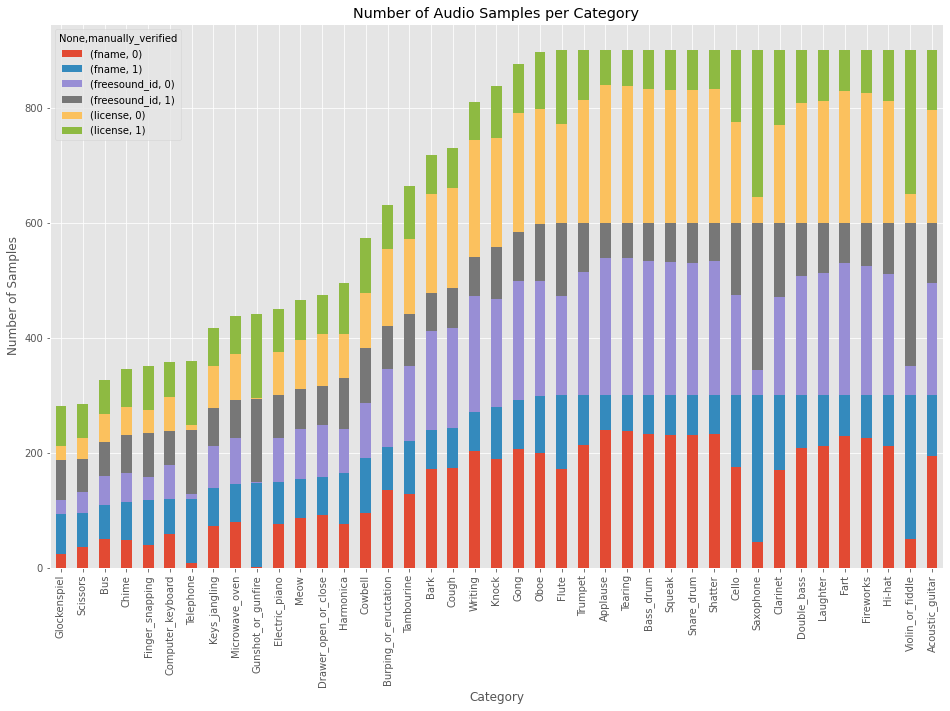

In [26]:
print("Number of training examples=", train.shape[0], "  Number of classes=", len(train.label.unique()))
print(train.label.unique())

# Distribution of Categories
category_group = train.groupby(['label', 'manually_verified']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");

### Visual

In [9]:
from __future__ import print_function
import random
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import csv
from tqdm.notebook import tqdm
from pprint import pprint
from matplotlib import pyplot as plt

In [10]:
class Args():
   def __init__(self):
     self.batch_size = 64
     self.test_batch_size = 1000     
     self.no_cuda = True
     self.seed = 1
     self.save_model = True

args = Args()

use_cuda = not args.no_cuda and torch.cuda.is_available()

torch.manual_seed(args.seed)

device = torch.device("cuda" if use_cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])), shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=args.test_batch_size, shuffle=True, **kwargs)

train_dataset = []
train_segmented = [[],[],[],[],[],[],[],[],[],[]]

for batch_idx, (data, target) in enumerate(train_loader):
    train_dataset.append([data, target])
    train_segmented[target.tolist()[0]].append([data, target])

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Train Size :  60000
Class Distribution:  [5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


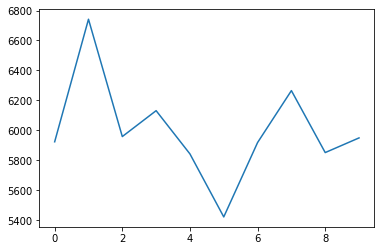

In [11]:
print('Train Size : ', len(train_dataset))
print('Class Distribution: ', [len(x) for x in train_segmented])
plt.plot([len(x) for x in train_segmented])

5


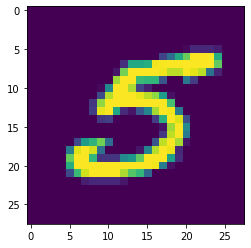

In [12]:
from random import randrange
index = randrange(0, len(train_dataset))
print(train_dataset[index][1].tolist()[0])
plt.imshow(train_dataset[index][0].reshape((28, 28)))

### Textual

In [1]:
! pip install -q --upgrade kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d stanfordu/stanford-natural-language-inference-corpus -p .
!unzip stanford-natural-language-inference-corpus.zip

Saving kaggle.json to kaggle.json
 81% 36.0M/44.4M [00:01<00:00, 21.6MB/s]
100% 44.4M/44.4M [00:01<00:00, 38.2MB/s]
Archive:  stanford-natural-language-inference-corpus.zip
  inflating: README.txt              
  inflating: snli_1.0_dev.csv        
  inflating: snli_1.0_test.csv       
  inflating: snli_1.0_train.csv      


In [2]:
!pip install -q unidecode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import string
import unidecode
import random
import torch

     |████████████████████████████████| 245kB 2.7MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
# Check if GPU is available
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
else: 
    print('No GPU available, training on CPU; consider making n_epochs very small.')

No GPU available, training on CPU; consider making n_epochs very small.


In [4]:
train_df = pd.read_csv('snli_1.0_train.csv')
test_df = pd.read_csv('snli_1.0_test.csv')

# author = train_df[train_df['author'] == 'EAP']["text"]

# train_text = pd.DataFrame(data=train_df["sentence2"].drop_duplicates())
train_text = train_df["sentence2"].drop_duplicates()
test_text = test_df["sentence2"].drop_duplicates()

print(len(train_text), len(test_text))
print(train_text.head())
print(test_text.head())

480041 9810
0    A person is training his horse for a competition.
1        A person is at a diner, ordering an omelette.
2                    A person is outdoors, on a horse.
3                    They are smiling at their parents
4                           There are children present
Name: sentence2, dtype: object
0    The church has cracks in the ceiling.
1          The church is filled with song.
2      A choir singing at a baseball game.
3                      The woman is young.
4                 The woman is very happy.
Name: sentence2, dtype: object


In [5]:
train = train_text.values.tolist()
test = test_text.values.tolist()

print(type(train))
print(train[:5])

def joinStrings(text):
    return ' '.join(str(string) for string in text)

train = joinStrings(train)
test = joinStrings(test)

print(len(train.split()))
print(len(test.split()))

<class 'list'>
['A person is training his horse for a competition.', 'A person is at a diner, ordering an omelette.', 'A person is outdoors, on a horse.', 'They are smiling at their parents', 'There are children present']
3730342
74099


In [6]:
stop = set(nltk.corpus.stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = nltk.stem.wordnet.WordNetLemmatizer()
def clean(doc):
        stop_free = " ".join([i for i in doc.split() if i not in stop])
        punc_free = "".join(ch for ch in stop_free if ch not in exclude)
        normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
        return normalized
train_sentence = clean(train).lower().split()
test_sentence = clean(test).lower().split()

In [7]:
# trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
#             for i in range(len(test_sentence) - 2)]
# chunk_len=len(trigrams)
# print(trigrams[:3])

twograms_train = [(train_sentence[i], train_sentence[i + 1])
            for i in range(len(train_sentence) - 1)]
chunk_len=len(twograms_train)

twograms_test = [(test_sentence[i], test_sentence[i + 1])
            for i in range(len(test_sentence) - 1)]
chunk_len_test=len(twograms_train)

print(len(twograms_train))
print(len(twograms_test))
print(twograms_train[:3])
print(twograms_test[:3])

2387194
47549
[('a', 'person'), ('person', 'training'), ('training', 'horse')]
[('the', 'church'), ('church', 'crack'), ('crack', 'ceiling')]


In [8]:
vocab = set(train_sentence + test_sentence)
voc_len=len(vocab)
word_to_ix = {word: i for i, word in enumerate(vocab)}
print(voc_len)
print(f"{train_sentence[256]} -> {word_to_ix[train_sentence[256]]}")

28723
the -> 3641
